# Flight price prediction

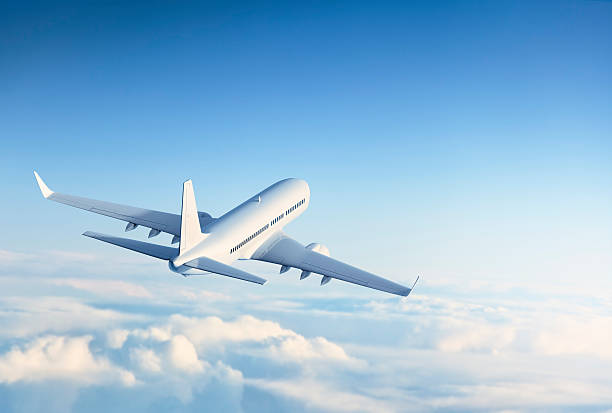

In [16]:
# displaying flight image
from IPython.display import Image 
Image("flight_img.jpg")

## 1. Domain Analysis


Travelers are constantly looking for flights at best deal to travel to places. But the prices of flights keep changing constantly. Flight prices vary widely depending on a number of factors, including the date of travel, the time of day, the airline, the route, and the availability of seats. This can make it difficult for travelers to find the best deals on flights.

### Analysis:

The given dataset comprises of various factors that affect the Price of flight. 
The independent variables(X) are :

>>	Airlines- Types of airlines affect the prices of flight. Here, the various airlines are GoAir, IndiGo, Jet Airways, Air India ,Vistara, Spice Jet, etc.

>>	Date of Journey- Date of Journey affect the prices of ticket. Tickets are expensive during the time where its demands are high/ or when people are travelling more, example- festivals, holidays, summer vacations, weekends, school breaks, etc.

>>	Source- The source here means place from where the file departs. The passengers journey will start from here. Demand, competition, operating costs, etc. affect the flight price at source.

>>	Destination- Destination means where the flight is headed. Popular destinations have higher prices.

>>	Route- The route /way the customer wants to travel also affects the price of his/her flight.

>>	Departure Time-  Time of departure impact the price of flight. Usually, flights that depart early in the morning or late in the evening are often more expensive than flights that depart during the middle of the day.

>>	Arrival Time- It is the time the flight lands in the destination. 

>>	Duration- The time it takes the flight to reach the destination is called duration. Longer the duration, higher the price.

>>	Total Stops- This is the number of places the flight stops on the way to its destination.

>>	Additional Info- Any additional services and amenities are included here. This column also includes whether or not meals are serves in flights. Meals have additional charges and can affect the final cost of flights.

### The dependent variable(y) is:
Price of flight- All the above features we discussed have some impact on the price of flight. 
However, not all the independent variables affect the dependent in the same manner. The independent variables that affect the dependent variable(Flight Price) the most will be considered for further analysis and model creation.


### Business case: 
Our goal is to predict the prices of flight on the basis of attributes discussed above.
We are going to create a Machine Learning Model to predict flight prices based on historical data. This model can then be used to help travelers find the best deals on flights.  


### Benefits:
The predictive model can help travelers to:

•	Find the best deals on flights

•	Save money on travel

•	Make more informed travel decisions

### The predictive model can help airlines to:
•	Optimize their pricing strategies

•	Increase their revenue

•	Improve their customer satisfaction

### Relationship between independent and dependent variables:

With the use of line chart in Power BI, the relationship between all the independent variables with the dependent variable was observed.
All features show some relationship between Flight price except Date of Departure and Additional Info. Hence, we consider these columns redundant and remove them during further analysis. 


In [14]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import datetime
import time
from datetime import timedelta
import re
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Loading the dataset
df = pd.read_excel("Flight_Fare.xlsx")

## 2. Basic checks 

In [13]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [17]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10683
Number of columns: 11


In [18]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [19]:
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


In [31]:
df.size

117513

In [32]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
# we can see that 
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [28]:
# Replace 'Delhi' with 'New Delhi' in the 'Destination' column
# as we need to clean the data before analysing it
df['Destination'] = df['Destination'].replace('Delhi', 'New Delhi')

In [29]:
# checking replaced data
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [20]:
# checking null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## 3. Exploratory data analysis(EDA)

### Univariate analysis

In [33]:
!pip install sweetviz

In [34]:
import sweetviz as sv #importing sweetviz library 
my_report = sv.analyze(df) #syntax to use sweetviz
my_report.show_html() #Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



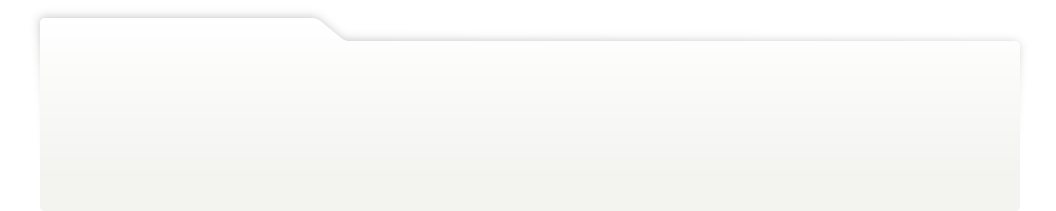
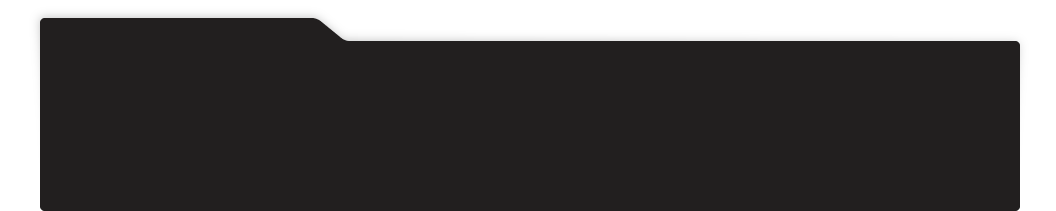
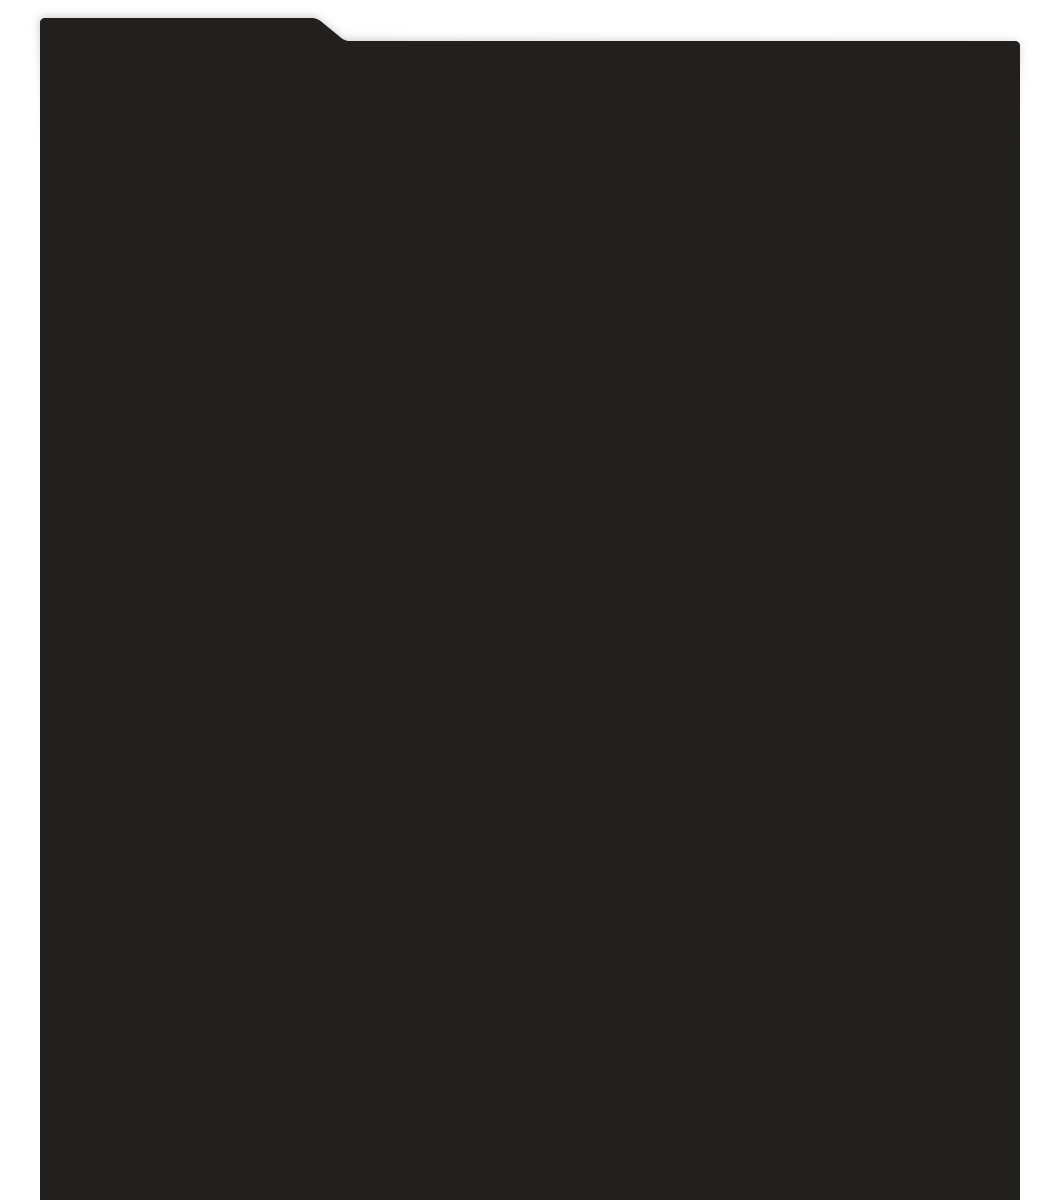
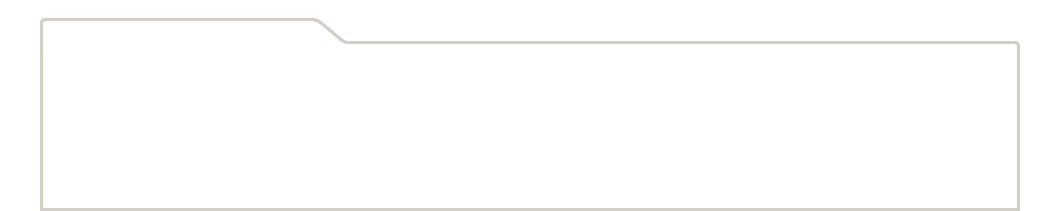
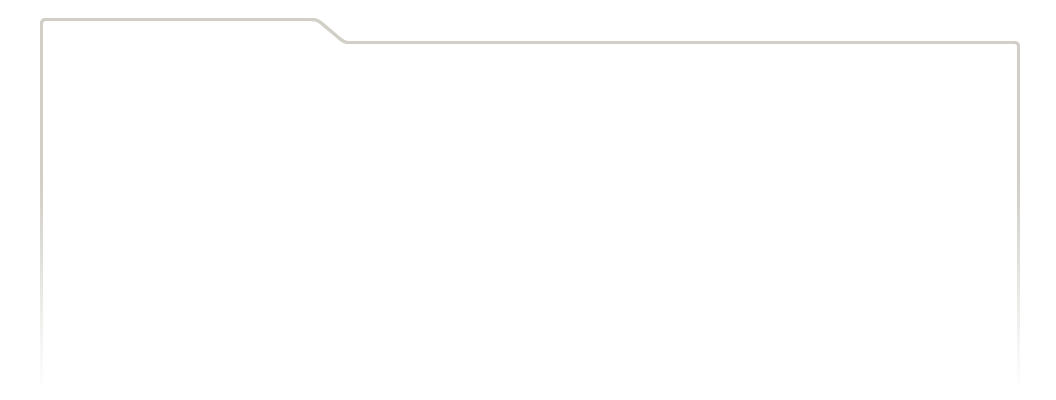
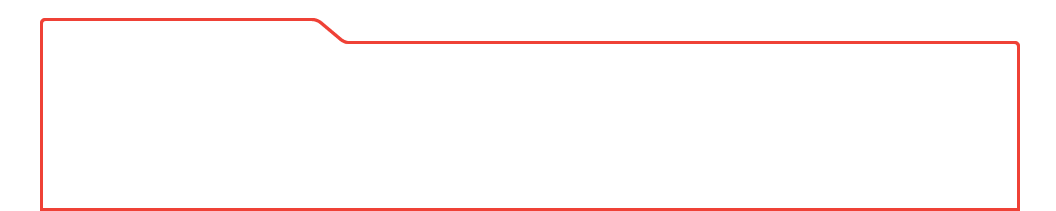
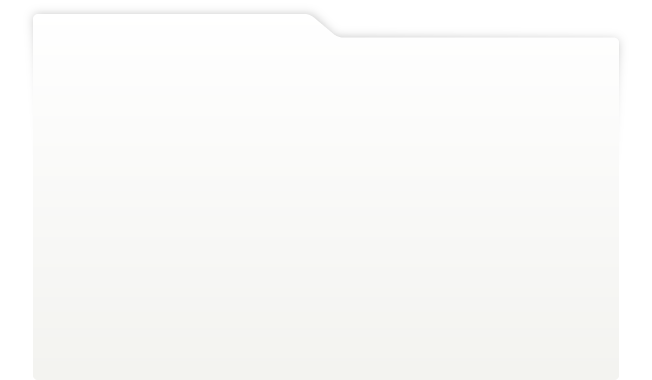
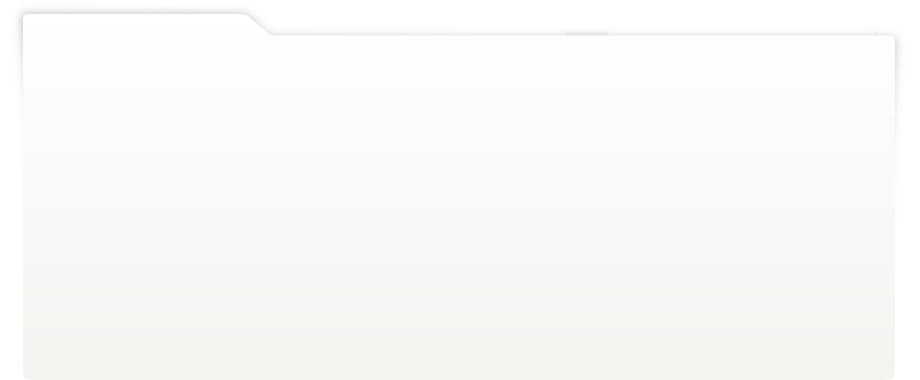
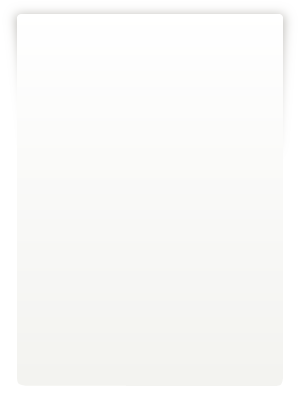
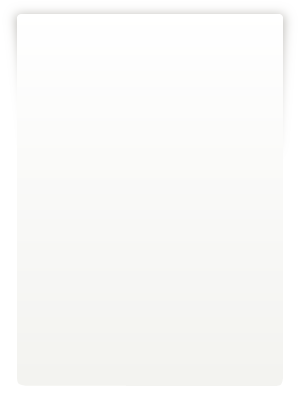
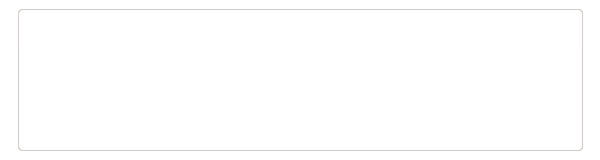
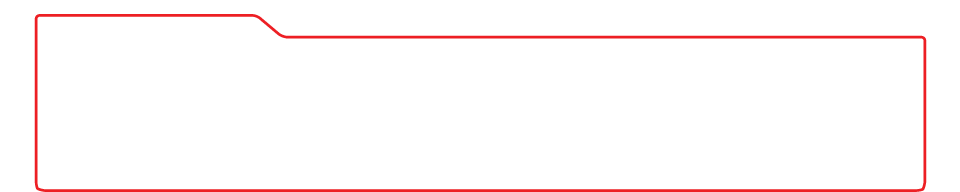
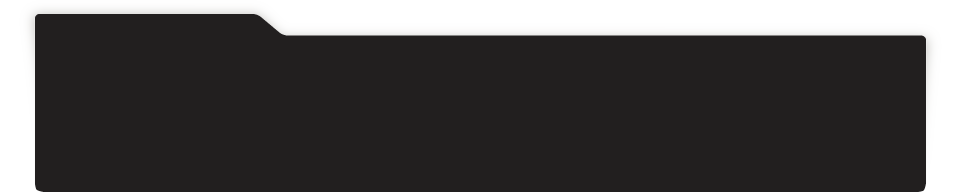
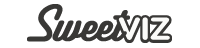
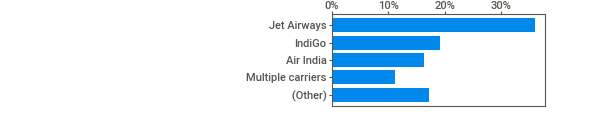
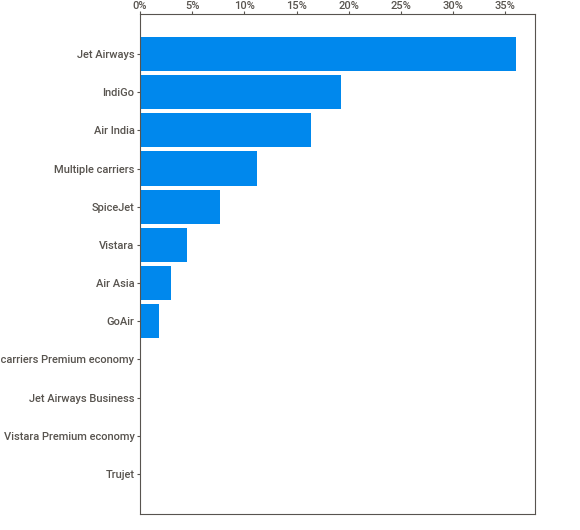
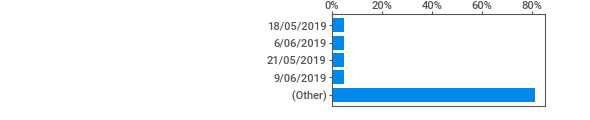
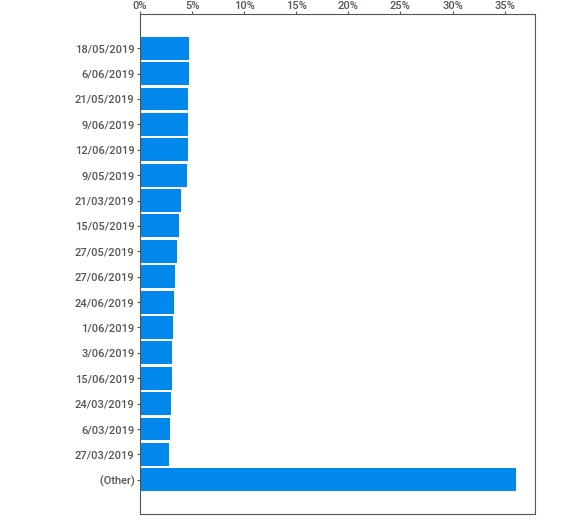
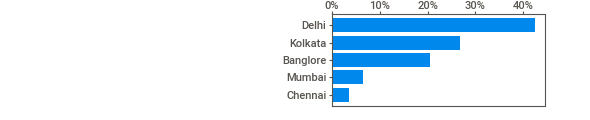
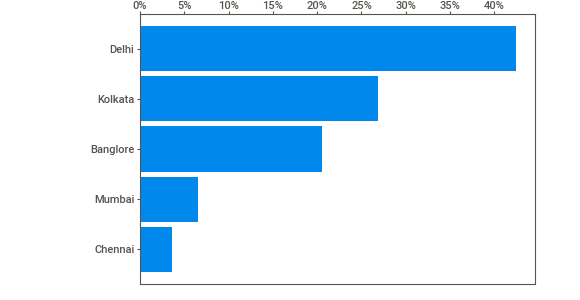
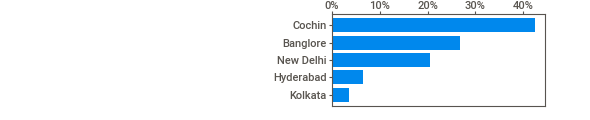
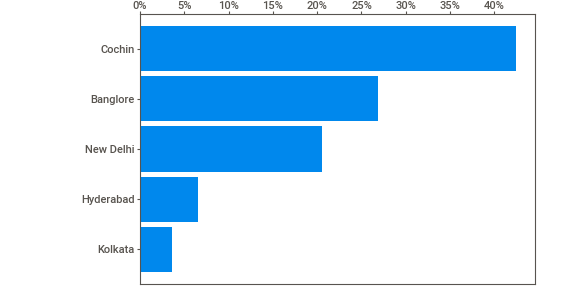
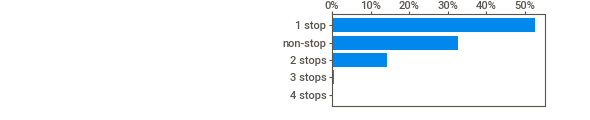
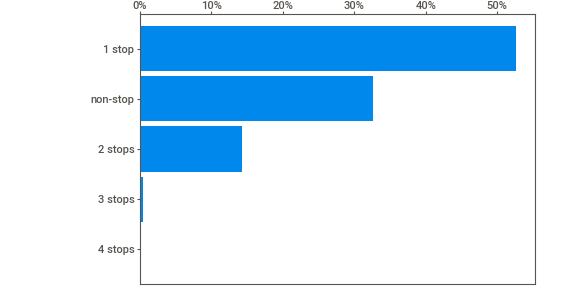
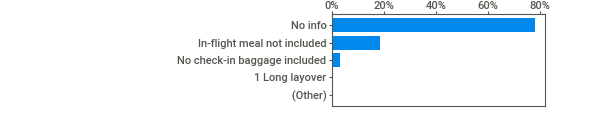
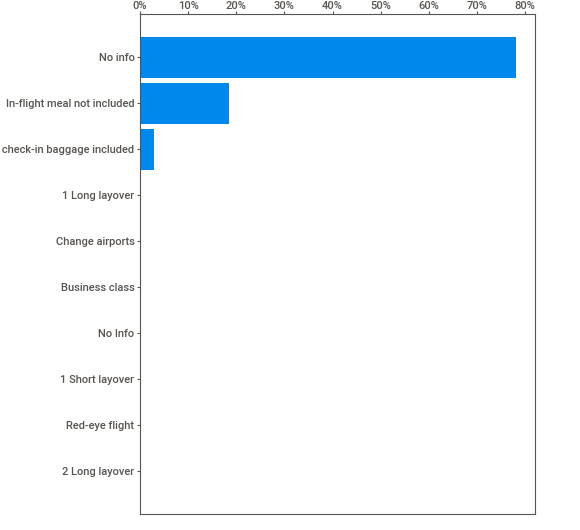
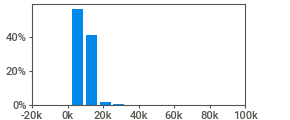
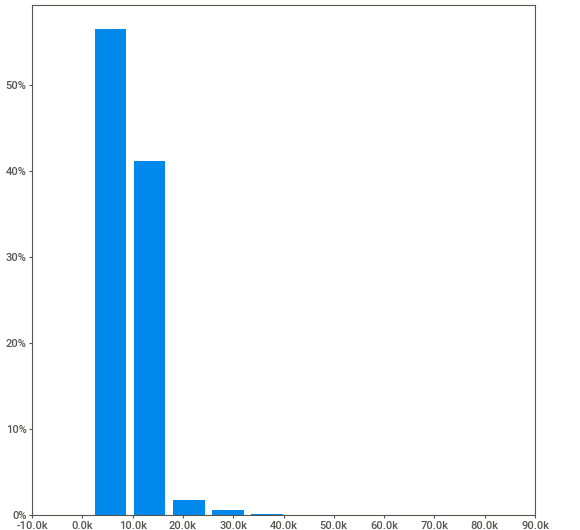
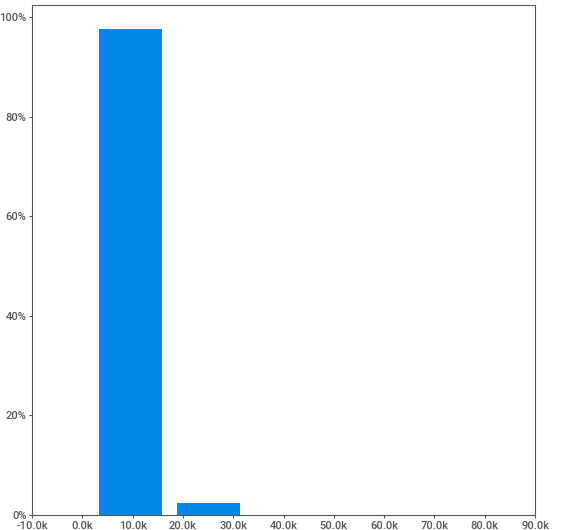
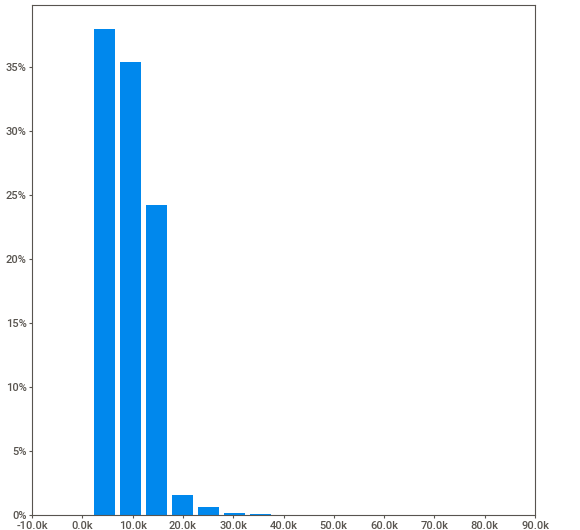
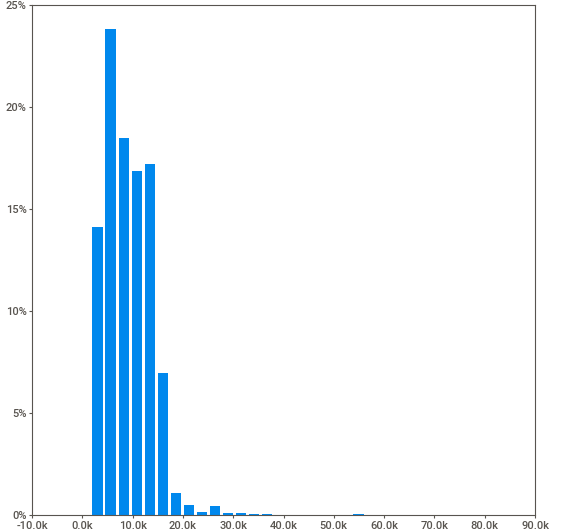
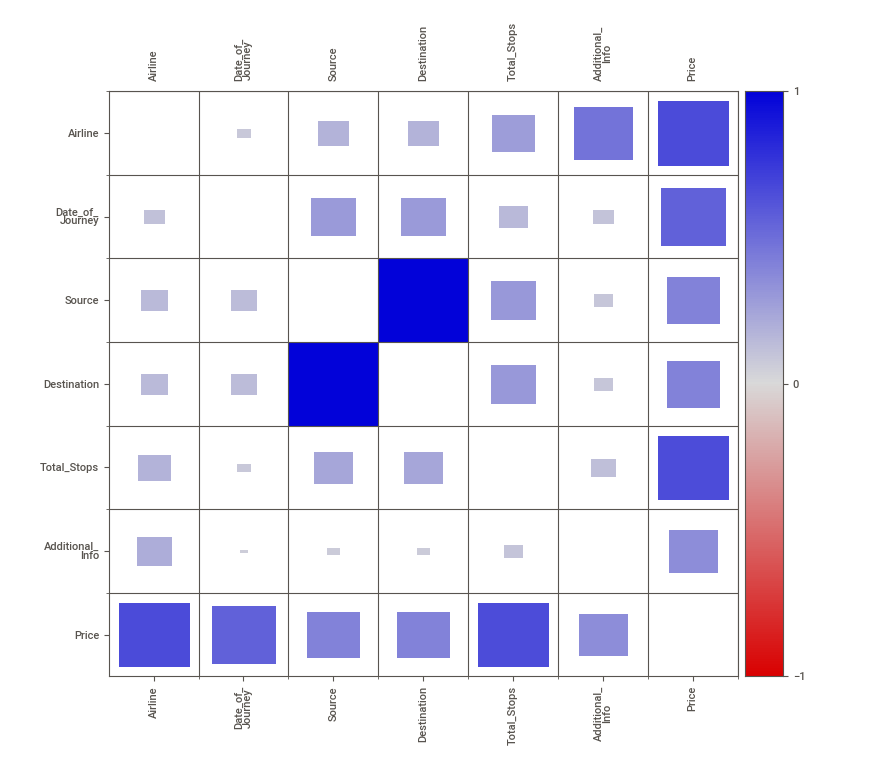
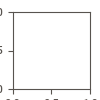

In [101]:
# incorporating sweetviz report in jupyter notebook
my_report.show_notebook()

In [46]:
## 1. Summary statistics for numerical variables 
numerical_summary = df.describe()
print("Summary statistics for numerical variables in df:\n", numerical_summary)

Summary statistics for numerical variables in df:
               Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


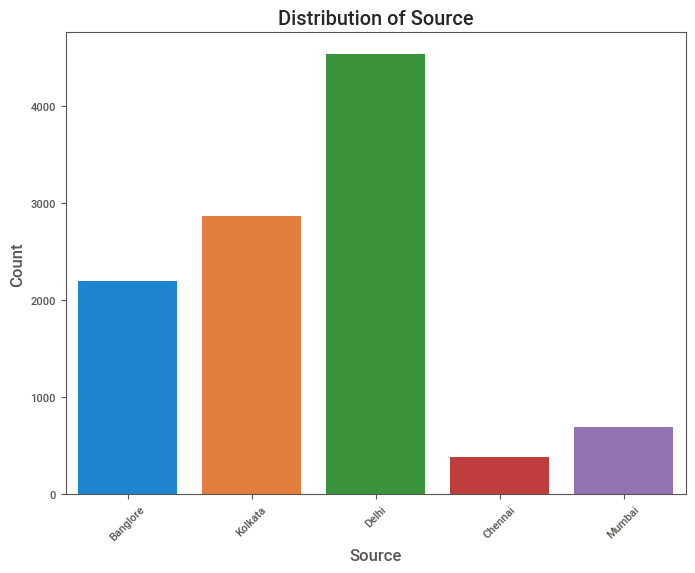

In [54]:
# 2. Distribution of 'Source' (categorical variable) using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Source', data=df)
plt.title('Distribution of Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

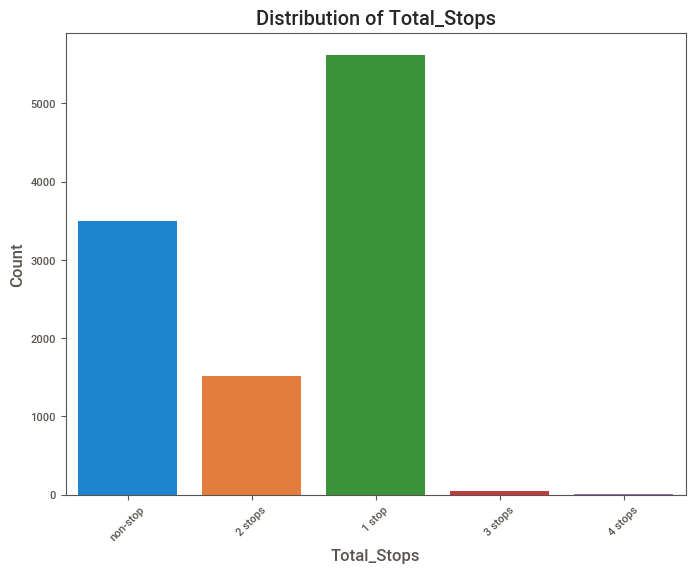

In [53]:
# 3. Distribution of 'Total_Stops' (categorical variable) using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Total_Stops', data=df)
plt.title('Distribution of Total_Stops')
plt.xlabel('Total_Stops')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

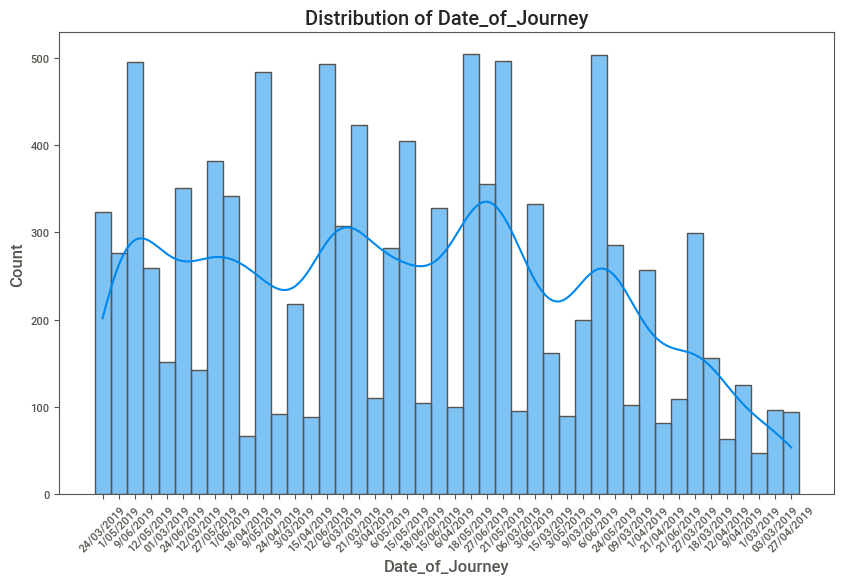

In [52]:
# 4. Distribution of 'Date_of_Journey' (date variable) using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df2['Date_of_Journey'], bins=30, kde=True)
plt.title('Distribution of Date_of_Journey')
plt.xlabel('Date_of_Journey')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

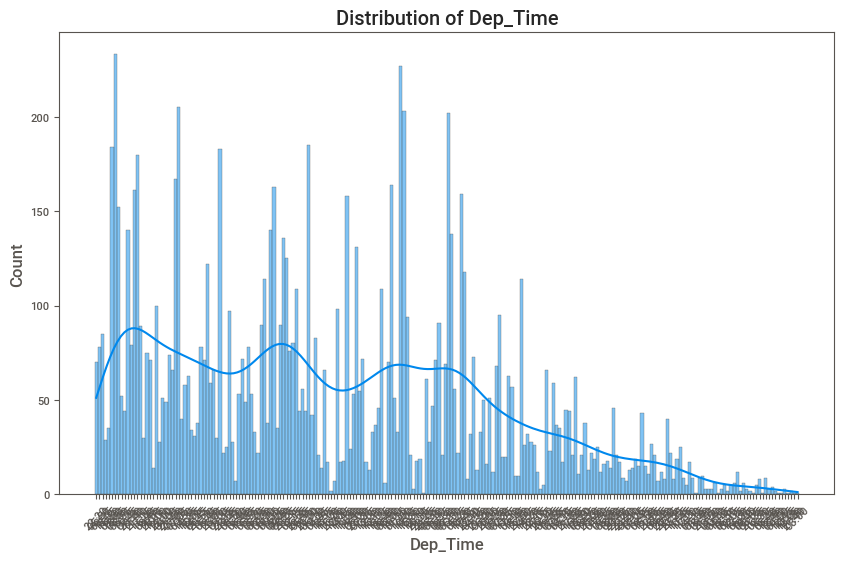

In [112]:
# 5. Distribution of 'Dep_Time' (time variable) using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df2['Dep_Time'], bins=30, kde=True)
plt.title('Distribution of Dep_Time')
plt.xlabel('Dep_Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Insights from Univariate Analysis:

> Jet Airways is the most traveled airlines, followed by IndiGo and Air India.

> In the given dataset, the source place with highest frequency of travel is Delhi followed by Kolkotta.

> People mostly travel to Cochin . Banglore is the destination that has the second highest frequency of traveling. 

> Delhi->Mumbai->Cochin is the most traveled route

> Most flights have duration of 2 hours 50 minutes

> Over 50% flights have 1 stop whereas over 30% have no stops

> Almost 20% flights don't have inflight meals and almost 5% flights do not allow check-in baggages

> Average price of flight is INR 9087. Lowest price of flight is INR 1,759 and highest price of flight is INR 79,512. 


### Bivariate Analysis

In [138]:
# grouping the features of the dataset with same datatypes into 2 different datframes
df1= df[["Source","Destination","Total_Stops"]]
df2=df[["Date_of_Journey","Dep_Time","Arrival_Time"]]

In [140]:
df1.head()

,Source,Destination,Total_Stops
0,Banglore,New Delhi,non-stop
1,Kolkata,Banglore,2 stops
2,Delhi,Cochin,2 stops
3,Kolkata,Banglore,1 stop
4,Banglore,New Delhi,1 stop


In [141]:
df2.head()

,Date_of_Journey,Dep_Time,Arrival_Time
0,2019-03-24,22:20,01:10 22 Mar
1,2019-01-05,05:50,13:15
2,2019-09-06,09:25,04:25 10 Jun
3,2019-12-05,18:05,23:30
4,2019-01-03,16:50,21:35


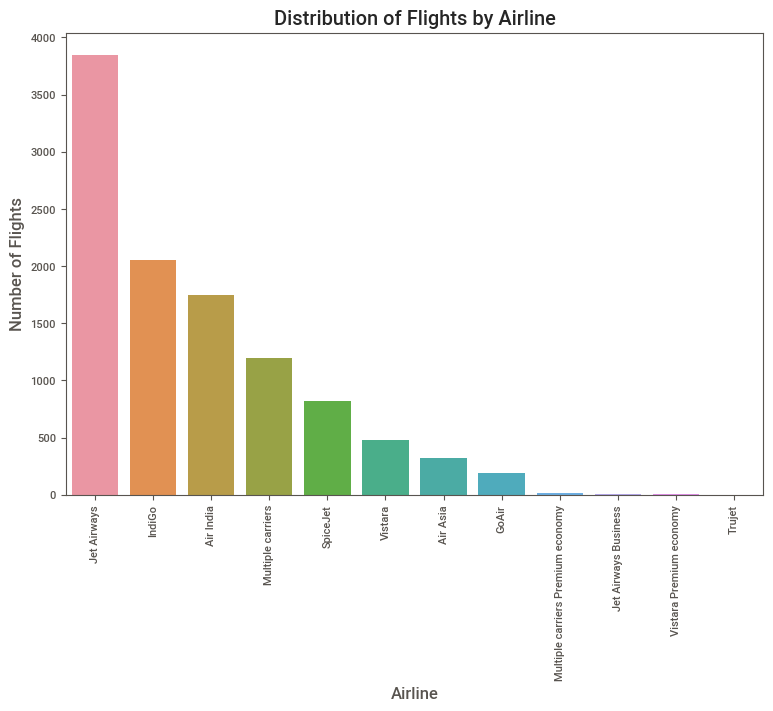

In [169]:
# Plot the distribution of flights by airline
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Airline')
plt.show()

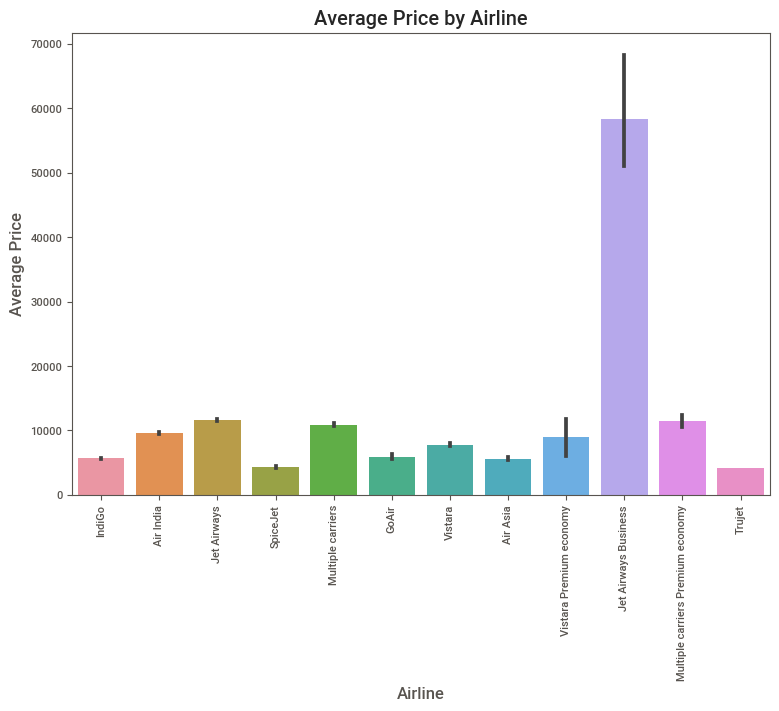

In [170]:
# Plot the distribution of Price by Airline
plt.figure(figsize=(9, 6))
sns.barplot(x='Airline', y='Price', data=df)
plt.title('Average Price by Airline')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

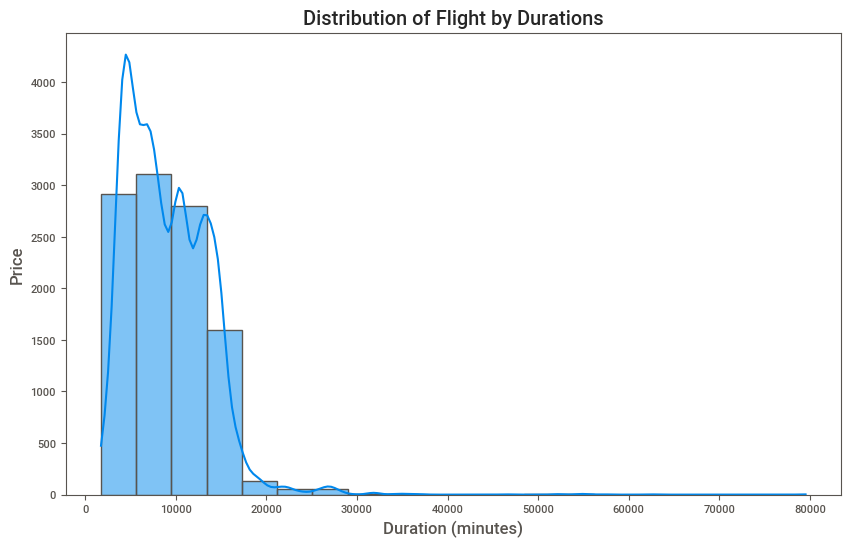

In [172]:
# Plot the distribution of price durations using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=20, kde=True)  
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Distribution of Flight by Durations')
plt.show()

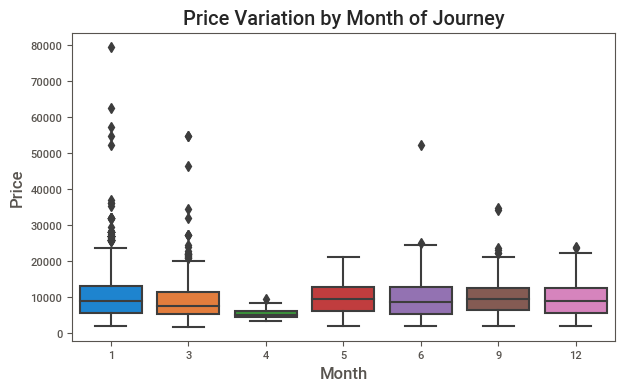

In [144]:
#  Date Analysis
# Convert 'Date_of_Journey' to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
# Extract month from 'Date_of_Journey'
df['Journey_Month'] = df['Date_of_Journey'].dt.month
# Box plot of Price by Month
plt.figure(figsize=(7, 4))
sns.boxplot(x='Journey_Month', y='Price', data=df)
plt.title('Price Variation by Month of Journey')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

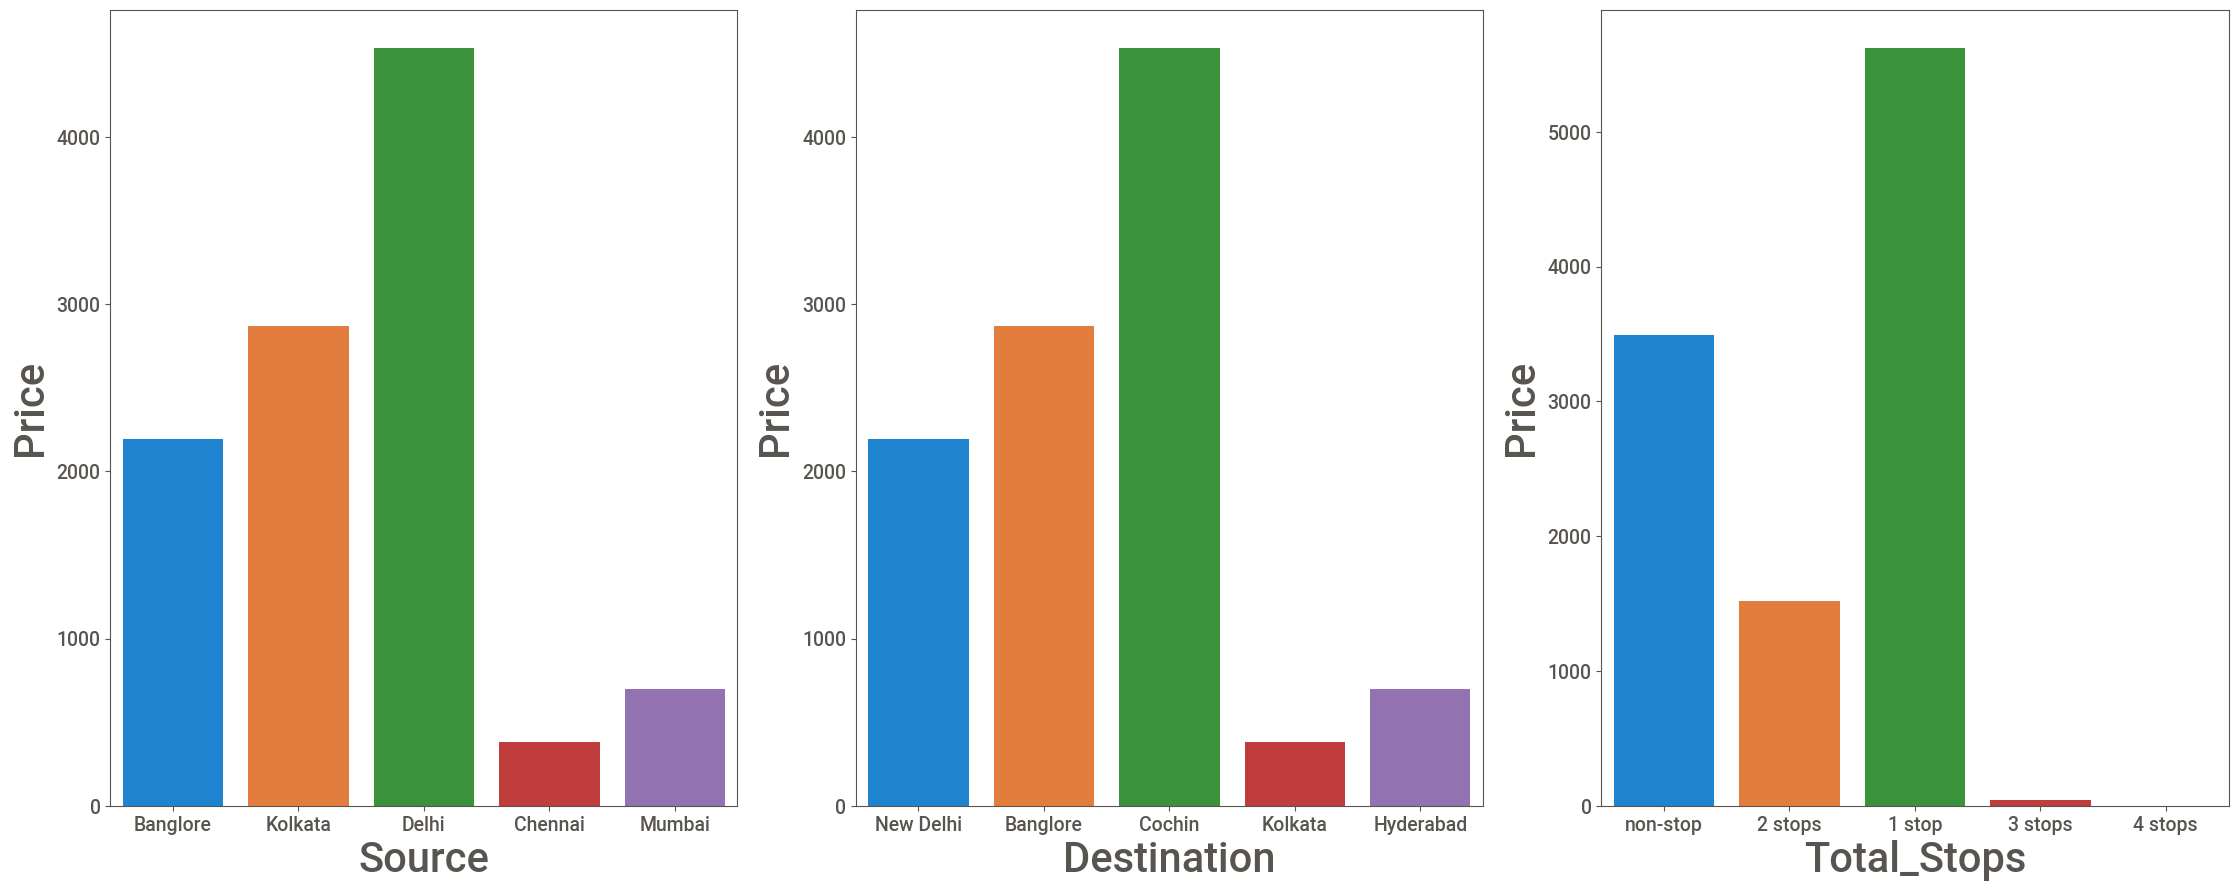

In [145]:
# analysing each feature of df1 with respect to target i.e. price
plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=7 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=df1[column])
        plt.xlabel(column,fontsize=30)
        plt.ylabel('Price',fontsize=30)
        ax.tick_params(labelsize=14)

    plotnumber+=1
plt.tight_layout()

In [63]:
# Analysing the relationship between 'Source' and 'Destination' using a crosstab
source_dest_crosstab = pd.crosstab(df1['Source'], df1['Destination'])
print("Crosstab between Source and Destination:\n", source_dest_crosstab)

Crosstab between Source and Destination:
 Destination  Banglore  Cochin  Hyderabad  Kolkata  New Delhi
Source                                                      
Banglore            0       0          0        0       2197
Chennai             0       0          0      381          0
Delhi               0    4537          0        0          0
Kolkata          2871       0          0        0          0
Mumbai              0       0        697        0          0


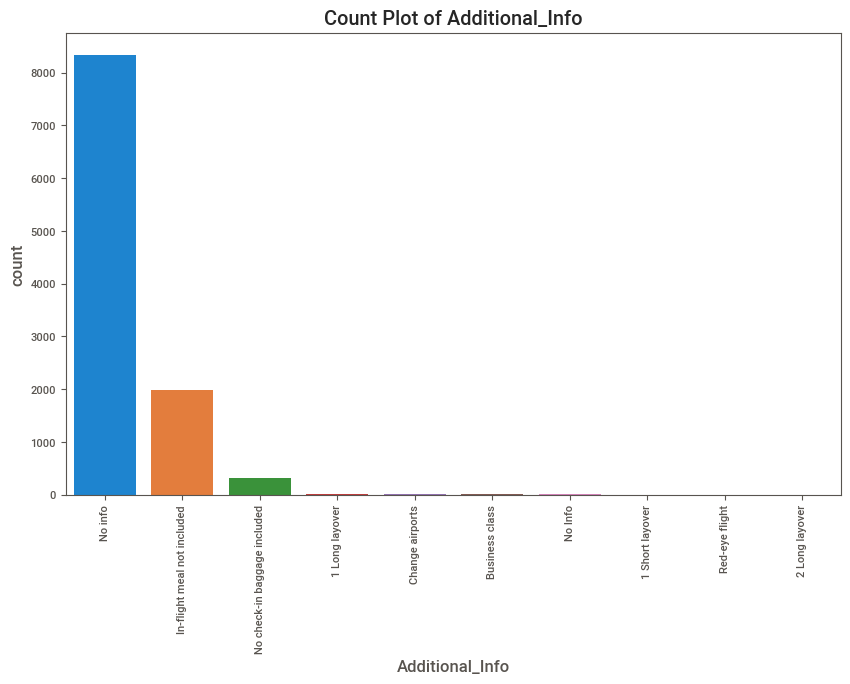

In [173]:
# Analysing the distribution of 'Additional_Info' using
# a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Additional_Info', data=df, order=df['Additional_Info'].value_counts().index)
plt.title('Count Plot of Additional_Info')
plt.xticks(rotation=90)
plt.show()

In [154]:
# Extracting the month and day of the week from
# 'Date_of_Journey' and analyze their relationship with 
# 'Dep_Time'
df2['Day_of_Week'] = df2['Date_of_Journey'].dt.day_name()

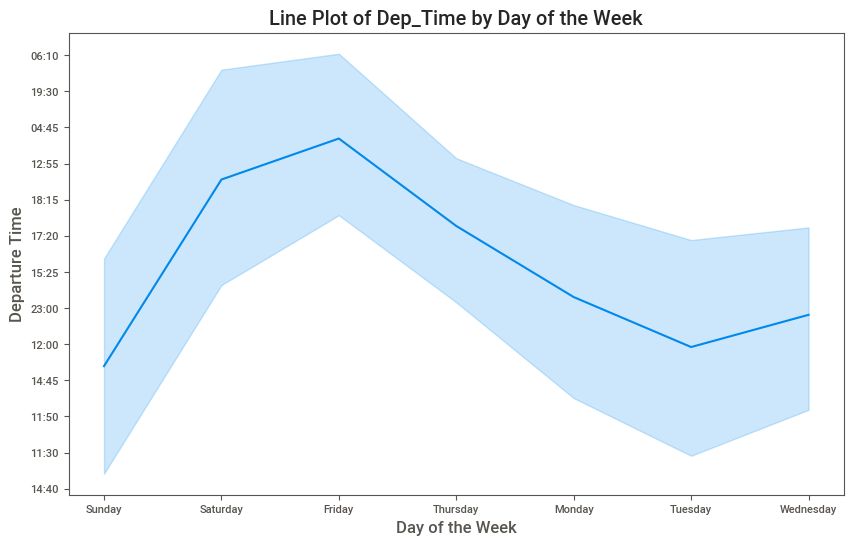

In [155]:
# Visualizing the relationship between 'Day_of_Week' and
# 'Dep_Time'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day_of_Week', y='Dep_Time', data=df2)
plt.title('Line Plot of Dep_Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Departure Time')
plt.xticks(rotation=0)
plt.show()

### Insights from Bivariate analysis:

>Jetairways has the highest number of flights and Trujet has the least number of flights 

> Jetairways business is the most expensive flight

> Trujet is the least expensive flight 

> Flights from Delhi are most expensive

> Flights to cochin are most expensive

> Prices of flights are highest in January and lowest in April

> flights having 1 stop is most expensive followed by nonstop flights

> The flights from Delhi to Cochin has the highest frequency

> The flights from Chennai to Kolkata has the least frequency

> By analysing "Additional_info" column we found out that 80% has no information and the remaining is redundant data

> The peak departure time is on Friday at 12:55am 


## 4. Preprocessing data

In [91]:
# checking the missing values present in the data
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Insights on null values
> There are a total of 2 null values

> there is 1 null value on the route column and 1 null value in total_stops column

> as there are only 2 null values we will drop it

In [92]:
# We drop the null values
df.dropna(inplace=True)

In [93]:
df.size

117502

In [94]:
df.shape

(10682, 11)

In [95]:
# verifying if all missing values are handled 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Handling duplicate rows

 Handling outliers 

Convert date_of_journey column to datetime object

  Extract date and month from date_of_journey

 Extract hours and minutes from dep_time

 Extract hours and minutes from arrival_time

 Extract hours and minutes from duration

 Convert categorical values from Airline using Onehot encoding

 Convert source column using Onehot encoding

 Convert destination column using Onehot encoding

 Manually encoding Total_stops column 

 Dropping Route column as we have the numerical equal of the data in Total_stops column

 Dropping Additional_info column as it is considered redundant data and isn't useful for model building

 Scaling

## 5. Feature Selection